#SA2-28 BAYQUEN
> githublink : https://github.com/notfolded/APM1111/blob/main/SA2_28_BAYQUEN.ipynb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Alzheimers Mice Data.csv")
df.head()

,AD_Status,Treatment,Training,Memory
0,1,1,12,10
1,1,1,15,12
2,1,1,13,13
3,1,1,12,10
4,1,1,14,13


# Assumption Validity

> Normality - Visual


Text(0.5, 1.0, 'Q-Q Plot for Memory Day')

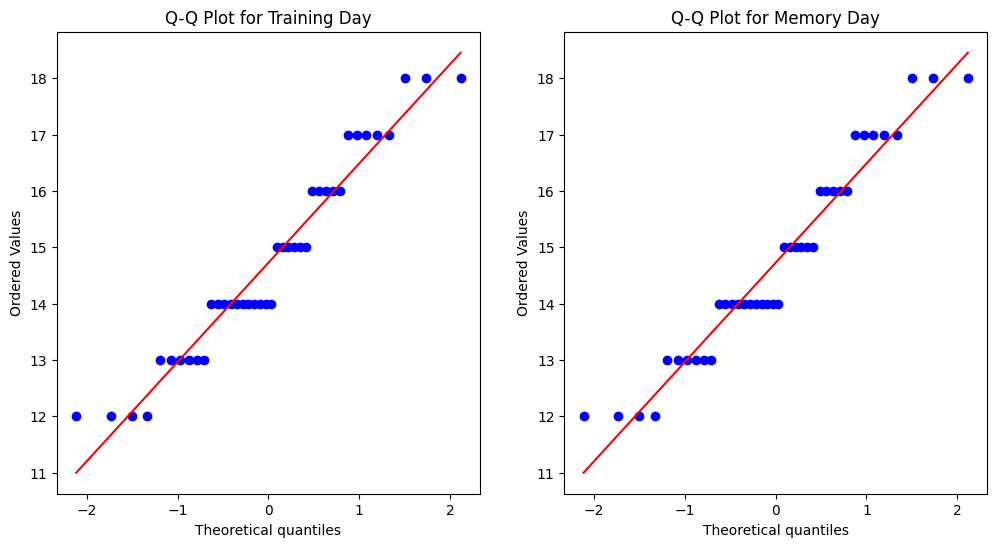

In [19]:

# Check Normality with Q-Q plots for both models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#Training Day
stats.probplot(df['Training'], dist="norm", plot=ax[0])
ax[0].set_title('Q-Q Plot for Training Day')

#Memory Day
stats.probplot(df['Training'], dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot for Memory Day')



























































Homogenity

In [16]:
#Leven's Grouping
groups_training = df.groupby(['AD_Status', 'Treatment'])['Training'].apply(list)
groups_memory = df.groupby(['AD_Status', 'Treatment'])['Memory'].apply(list)\

levene_training = stats.levene(*groups_training)
levene_memory = stats.levene(*groups_memory)

print(levene_training)
print(levene_memory)

LeveneResult(statistic=0.4346076458752513, pvalue=0.8730505780891101)
LeveneResult(statistic=0.8274582560296846, pvalue=0.5722200263972532)


since we have a p-value > 0.05, both data satisfies the homogeneity test of variances.

# ANOVA

In [17]:
model_training = ols('Training ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_training = sm.stats.anova_lm(model_training, typ=2)

anova_training

,sum_sq,df,F,PR(>F)
C(AD_Status),3.025,1.0,1.216080,0.278356
C(Treatment),28.275,3.0,3.788945,0.019678
C(AD_Status):C(Treatment),9.075,3.0,1.216080,0.319771
Residual,79.600,32.0,NaN,NaN


AD Status and Treatment Interaction (TRAINING)

There is no significant interaction between the two on the Training Day Errors.



In [18]:
model_memory = ols('Memory ~ C(AD_Status) * C(Treatment)', data=df).fit()
anova_memory = sm.stats.anova_lm(model_memory, typ=2)

anova_memory

,sum_sq,df,F,PR(>F)
C(AD_Status),189.225,1.0,75.313433,6.449421e-10
C(Treatment),14.475,3.0,1.920398,1.461176e-01
C(AD_Status):C(Treatment),8.675,3.0,1.150912,3.436263e-01
Residual,80.400,32.0,NaN,NaN


AD Status and treatment Interaction (MEMORY)

The ANOVA result shows us that there is a significant main effect on the number of errors made during memory Day. having F = 75.313433 and p-values of <0.05.

